In [65]:
import pandas as pd
from pandas import Series, DataFrame

In [66]:
titanic_df = pd.read_csv('train.csv')

In [67]:
#see a preview of the data from scratch
titanic_df.head()
#0 means dead
#1 means survived
#Classes 1,2,3
#gender
#age
#sibsb - siblings on board?
#PARCH parents or child on board?
#Ticket number
#What they paid for it
#Cabin information, some missing
#embarked S, C, stands for cities

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
# What do I want to achieve from this data set?
# Who were the passnegers? (ages,gender,classes,etc)
# what deck were the passengers on that relates to class?
# where di the passengers come from?
# whow was alone and who was with family?
# What factors helped someone survive the sinking of the titanic?

In [70]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

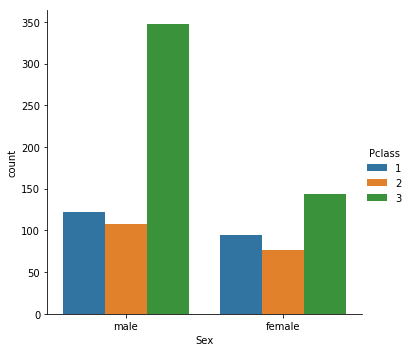

In [71]:
#Who were the passengers?
# LEts check out gender distribution
sns.catplot('Sex',data=titanic_df,kind='count',hue='Pclass')

In [72]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age <18:
        return 'child'
    else:
        return sex

In [73]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [74]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


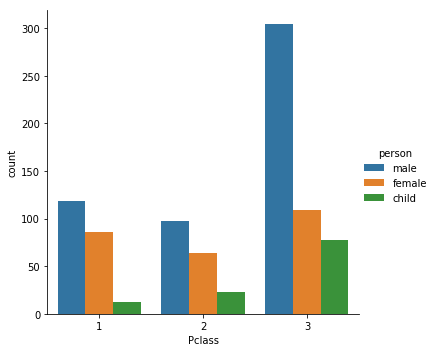

In [75]:
sns.catplot('Pclass',data=titanic_df,kind='count',hue='person')

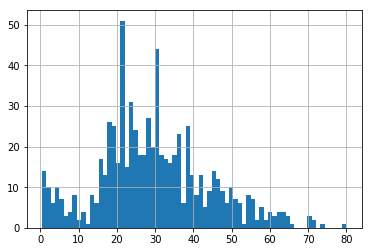

In [76]:
titanic_df['Age'].hist(bins=70)

In [77]:
titanic_df['Age'].mean()

29.69911764705882

In [78]:
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


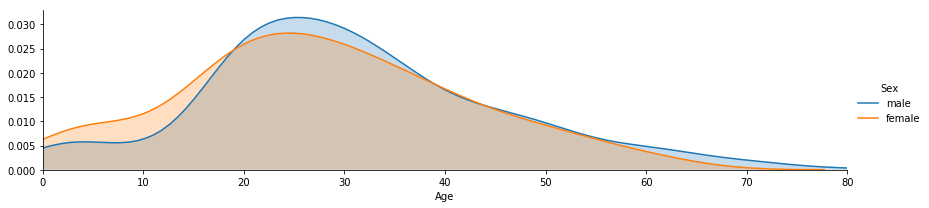

In [81]:
#we can use a facet grid with multiple kde plots
#done using seabon facetgrid from titatnic_df dataframe, set hue = to Sex and aspect stretch it out
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

#mapped kde plots based on age
fig.map(sns.kdeplot,'Age',shade=True)

#set oldest = to max age
oldest = titanic_df['Age'].max()

#set x limits from 0 to oldest
fig.set(xlim=(0,oldest))

fig.add_legend()

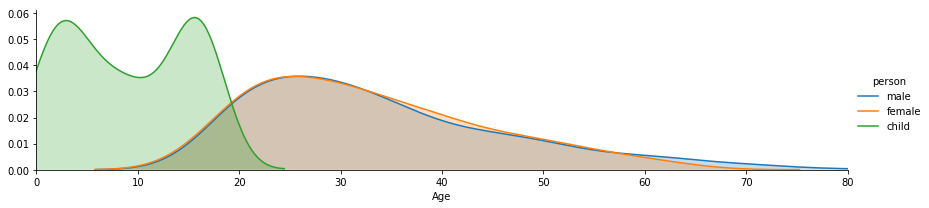

In [82]:
#we can use a facet grid with multiple kde plots
#done using seabon facetgrid from titatnic_df dataframe, set hue = to Sex and aspect stretch it out
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

#mapped kde plots based on age
fig.map(sns.kdeplot,'Age',shade=True)

#set oldest = to max age
oldest = titanic_df['Age'].max()

#set x limits from 0 to oldest
fig.set(xlim=(0,oldest))

fig.add_legend()

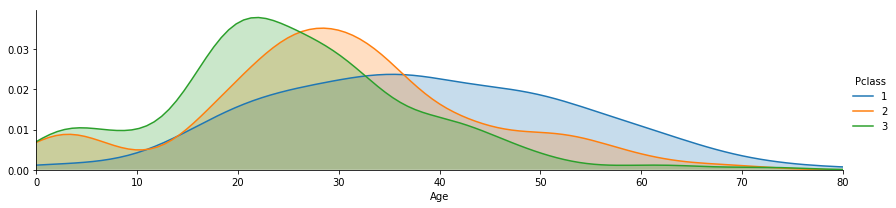

In [83]:
#We can do the same for classes
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

#mapped kde plots based on age
fig.map(sns.kdeplot,'Age',shade=True)

#set oldest = to max age
oldest = titanic_df['Age'].max()

#set x limits from 0 to oldest
fig.set(xlim=(0,oldest))

fig.add_legend()

In [85]:
#What deck were the passengers on and how does that relate to class?
titanic_df.head()
#We will need to drop the NAN values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [111]:
#We will need to drop the NAN values
deck = titanic_df['Cabin'].dropna()

In [112]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

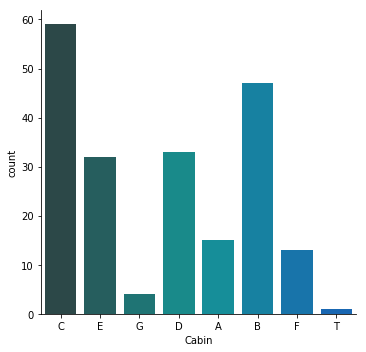

In [113]:
#We don't want to grab every single part of the deck, just the first letters A, B, and C, etc for analysis purposes.
# Let's do this using a for loop
levels = []
#appending first letter
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,kind='count', palette='winter_d')

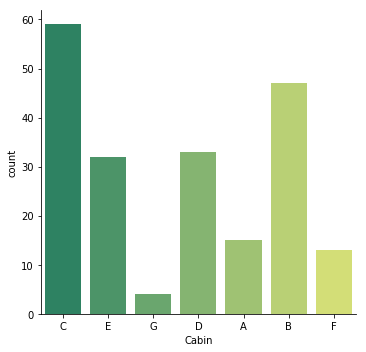

In [114]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin',data=cabin_df,kind='count', palette='summer')

In [115]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


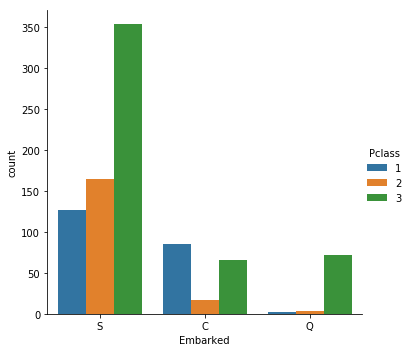

In [119]:
sns.catplot('Embarked', data=titanic_df, kind='count',hue='Pclass')

In [120]:
#  Who was alone AND who was with family?
titanic_df.head()
#From column : SibSB 0 - 1 true or false they had siblings on board
#From column : Parch  parents or children   0 false  neither  1 true either

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [121]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [122]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [123]:
# Going to look through alone, greator or = to 0 and set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [124]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


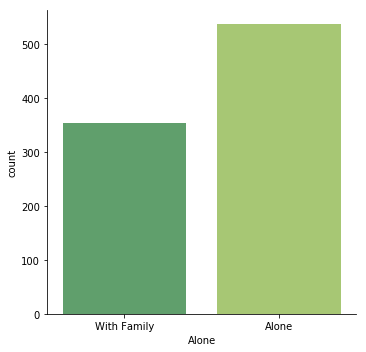

In [127]:
sns.catplot('Alone',data=titanic_df,kind = 'count', palette='summer')

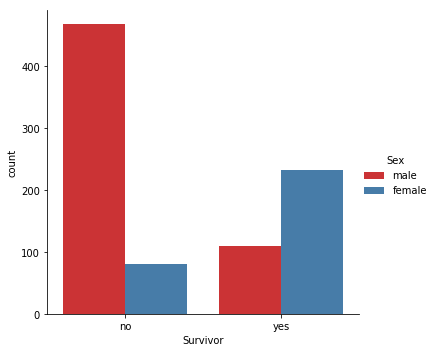

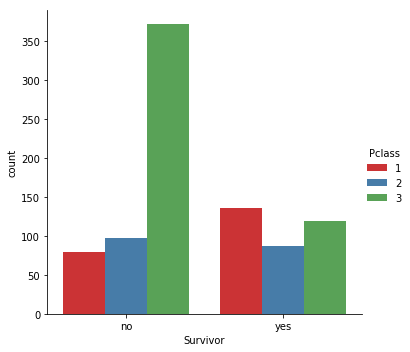

In [132]:
# What factors help someone survive?
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

#Lets plot the survivors
sns.catplot('Survivor',data=titanic_df,kind='count',hue='Sex',palette = 'Set1')
sns.catplot('Survivor',data=titanic_df,kind='count',hue='Pclass',palette = 'Set1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


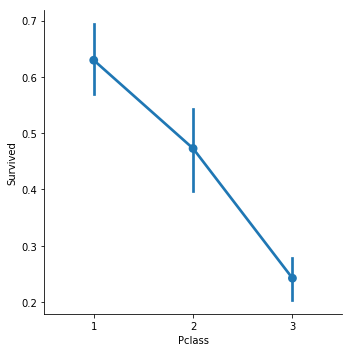

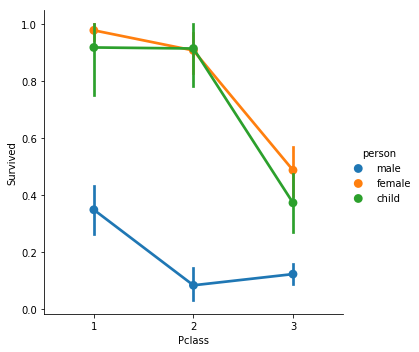

In [137]:
#Survival rates per class
sns.factorplot('Pclass','Survived',data=titanic_df)
#Survival rates per class
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


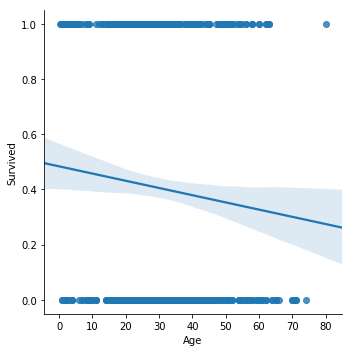

In [138]:
#Survival rates per class
#What about age?
sns.lmplot('Age','Survived',data=titanic_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


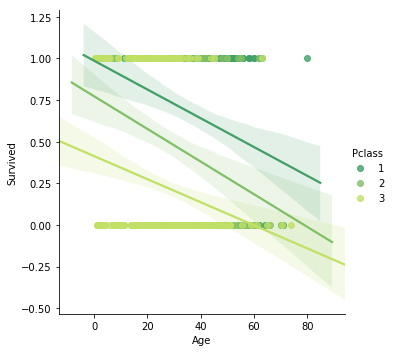

In [145]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer')

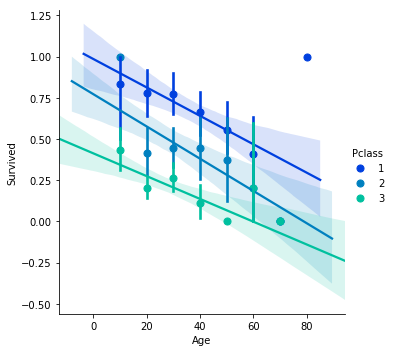

In [147]:
#lets make some age bins so we can sort the generations 10-20-30-etc then do a std on that
generations = [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


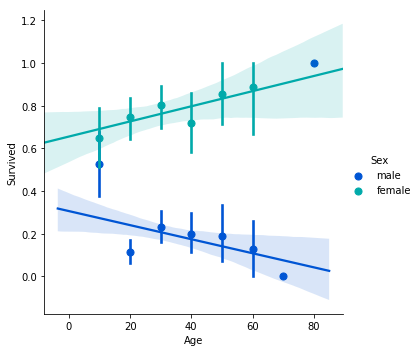

In [149]:
#How does gender and age look?
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [ ]:
#Question 1 : Did the deck have an effect on the passenger survival rate?
            # How does this match up with what your intuition tells you about this?
            # How does being a male effect those chances?
    
#Question 2: Did havin a family member increase the odds of surviving the crash?


